### Generating bootstrap replicates
- In inference problems, it is rare that we are interested in the result from a single experiment or data acquisition.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set(rc={'figure.figsize':(11,8)})

In [3]:
np.random.choice([1,2,3,4,5], size=5)

array([3, 1, 3, 1, 1])

In [4]:
michelson_speed_of_light = pd.read_csv('michelson_speed_of_light.csv')
michelson_speed_of_light = np.array(michelson_speed_of_light['velocity of light in air (km/s)'])
len(michelson_speed_of_light)

100

In [5]:
bs_sample = np.random.choice(michelson_speed_of_light, size=100)
print(np.mean(bs_sample))
print(np.median(bs_sample))
print(np.std(bs_sample))

299843.1
299840.0
81.16273775569674


In [6]:
sheffield = pd.read_csv('sheffield_weather_station.csv', sep = '\s+', skiprows=8)
sheffield

,yyyy,mm,tmax,tmin,af,rain,sun
0,1883,1,6.3,1.7,6,122.1,---
1,1883,2,8.0,2.8,2,69.8,---
2,1883,3,4.8,-1.6,23,29.6,---
3,1883,4,12.2,3.8,2,74.0,---
4,1883,5,14.7,6.2,0,31.2,---
5,1883,6,17.7,9.3,0,66.2,---
6,1883,7,18.8,10.5,0,77.6,---
7,1883,8,19.8,10.9,0,32.5,---
8,1883,9,16.8,10.0,0,137.4,---
9,1883,10,12.7,6.4,0,102.9,---


In [23]:
rainfall = np.array(sheffield.groupby('yyyy').sum()['rain'])
rainfall, len(rainfall)

(array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
         878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
         752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
         803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
         835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
         883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
         927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
         936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
         771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
         700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
         736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
         770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
         960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
         789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8, 

In [8]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

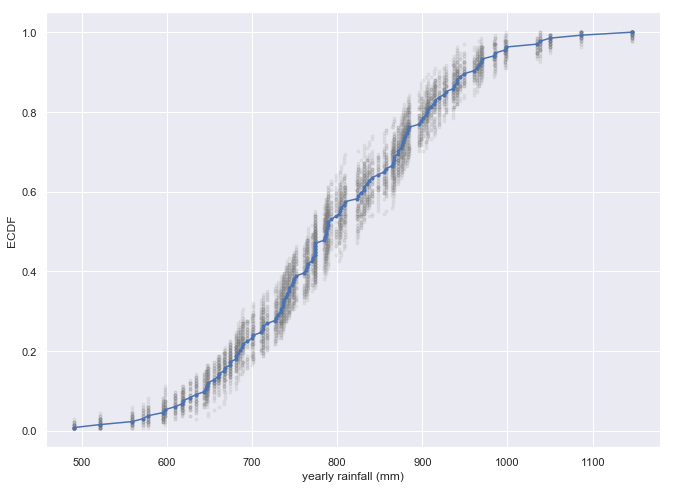

In [9]:
for _ in range(50):
    bs_sample = np.random.choice(rainfall, size=len(rainfall))
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='grey', alpha=0.1)
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

### Bootstrap replicate function 

In [11]:
def bootstrap_replicate_1d(data, func):
    '''Generate bootstrap replicate of 1D data.'''
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [12]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299863.1

In [13]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299865.2

In [14]:
bootstrap_replicate_1d(michelson_speed_of_light, np.mean)

299836.7

In [16]:
bs_replicates = np.empty(10000)
for i in range(10000):
    bs_replicates[i]=bootstrap_replicate_1d(
                    michelson_speed_of_light, np.mean)

In [17]:
bs_replicates

array([299862.1, 299863.9, 299868.1, ..., 299835.4, 299862.7, 299859.2])

### Bootstrap estimate of the mean 

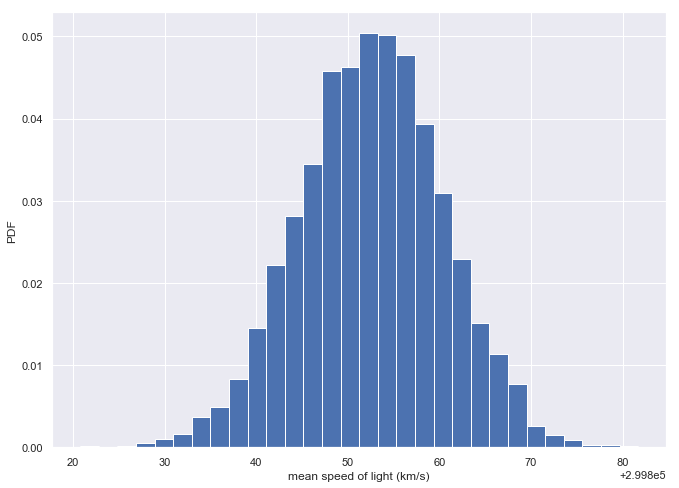

In [19]:
_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('mean speed of light (km/s)')
_ = plt.ylabel('PDF')

### Confidence interval of a statistic 
- If we repeated measurements over and over again, *p%* of the observed values would lie within the *p%* confidence interval.

### Bootstrap confidence interval

In [21]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([299837.2, 299867.6])

In [22]:
def draw_bs_reps(data, func, size=1):
    '''Draw bootstrap replicates'''
    bs_replicates = np.empty(size)
    
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
        
    return bs_replicates

#### Bootstrap replicates of the mean and the SEM

In [30]:
rainfall = rainfall[:-1]
len(rainfall)

132

In [31]:
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)
bs_replicates

array([796.20833333, 802.17045455, 796.44318182, ..., 802.7719697 ,
       794.95075758, 811.06742424])

In [32]:
sem = np.std(rainfall) / np.sqrt(len(rainfall))
sem

10.590037212325742

In [33]:
bs_std = np.std(bs_replicates)
bs_std

10.495405737053266

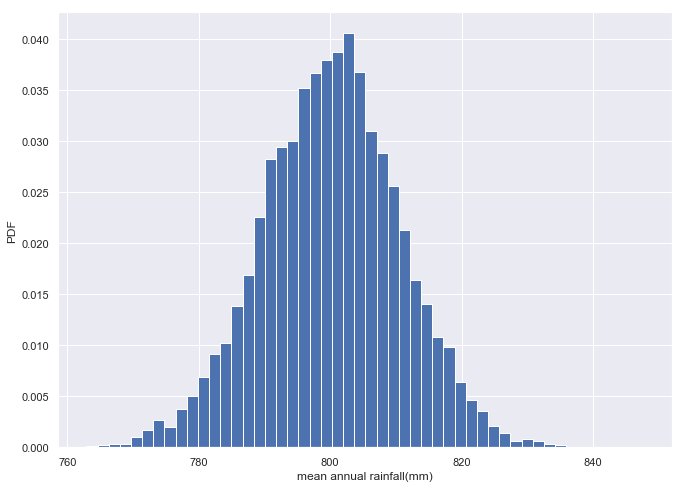

In [34]:
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall(mm)')
_ = plt.ylabel('PDF')

In [36]:
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
conf_int

array([779.08935606, 820.55329545])

In [37]:
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)
bs_replicates = bs_replicates/100

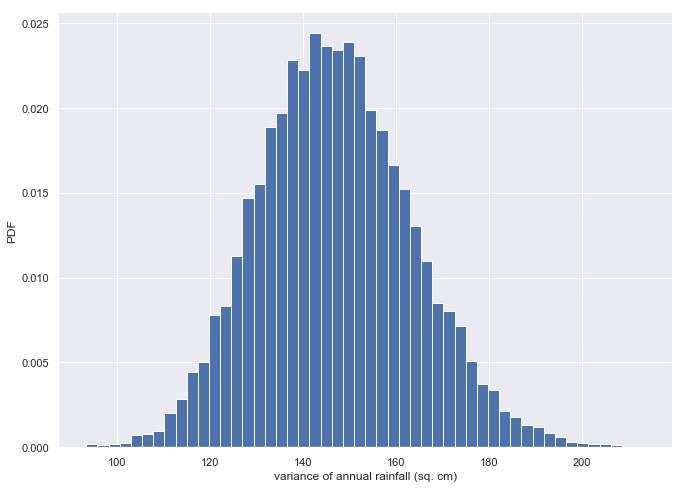

In [38]:
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

In [39]:
no_hitter = pd.read_csv('mlb_nohitters.csv', index_col='date', parse_dates=True)
modern_era = no_hitter.loc['1900-07-12':]
nohitter_times = modern_era['game_number'].diff() - 1
nohitter_times = np.array(nohitter_times[1:].values).astype(int)
nohitter_times

array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  3

In [40]:
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'games')

95% confidence interval = [661.00258964 871.41424303] games


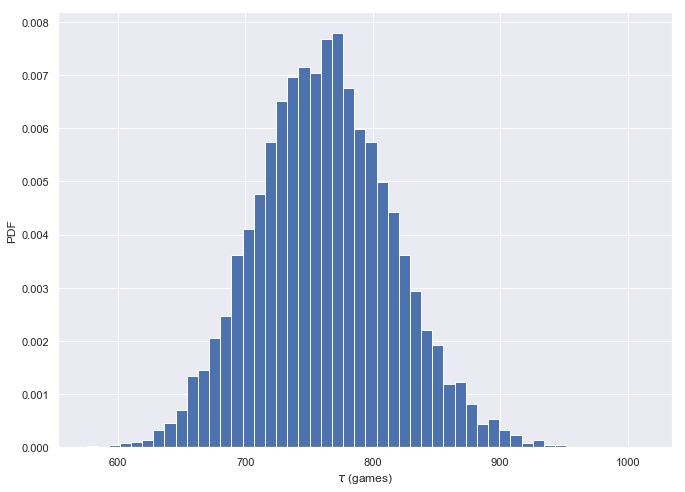

In [41]:
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

### Nonparametric inference
- Make no assumptions about the model of probability distribution underlying the data

### Pairs bootstrap for linear regresssion 
- Resample data in pairs
- Compute slope and intercept from resampled data
- Each slope and intercept is a bootstrap replicate
- Compute confidence intervals from percentiles fo bootstrap replicates 

In [43]:
np.arange(7)

array([0, 1, 2, 3, 4, 5, 6])

In [44]:
swing = pd.read_csv('2008_swing_states.csv')
dem_share = swing['dem_share']
total_votes = swing['total_votes']

In [45]:
inds = np.arange(len(total_votes))
bs_inds = np.random.choice(inds, len(inds))
bs_inds

array([103, 146, 195,   6, 192,  31,  31, 203, 125,  73,  58, 111,  56,
         1,  27, 214,   5,  22,  69, 197, 220, 147,  76, 208,  93,   2,
        94, 172, 146, 185,  74,  14, 129,  91,  50,   5,  94, 195, 122,
       167, 206,  56,  94,  28, 107,  22, 218, 102, 164, 104,  28,  20,
        98,  14,  54, 193, 124, 200, 196, 172, 184, 218,  36,  72,  19,
       179, 127, 215, 100,  46,  53,  56, 174,  38,  25,  12,  64,  90,
       221, 122, 147,  18, 106,   2,   4, 110,  66,  58,  93,  13, 102,
       206,  63, 150,  98, 210,  68, 152,  84,  77,   5,  99,  87,   5,
        74,  97,  82, 148, 184,  22,  12, 147,  16,  16, 160, 208,  53,
        32, 156,  97, 135, 218,  70, 213, 195,  16,  23,  66, 210, 107,
        36, 104, 139,  34,   2, 221,  25, 100, 173, 219,  80,  52, 105,
       186,  69,  82, 174,  28,  25, 120,  76, 148, 149,   2,  99, 115,
       159, 216, 141,  11, 147,  48,  36, 162, 152, 129, 221, 209, 100,
       210, 165, 150,   2,   5,  10, 105,  11,  87, 122,   0, 18

In [46]:
bs_total_votes = total_votes[bs_inds]
bs_dem_share = dem_share[bs_inds]

In [47]:
bs_slope, bs_intercept = np.polyfit(bs_total_votes, 
                                    bs_dem_share, 1)
bs_slope, bs_intercept

(3.8905641219067956e-05, 39.559608040179135)

In [48]:
np.polyfit(total_votes, dem_share, 1)

array([4.0370717e-05, 4.0113912e+01])

#### A function to do pairs bootstrap

In [51]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    inds = np.arange(len(x))
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)
    
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

In [54]:
female_fert_ill = pd.read_csv('female_literacy_fertility.csv')
fertility = np.array(female_fert_ill['fertility'])
illiteracy = np.array(100-female_fert_ill['female literacy'])